In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import sklearn
from IPython.display import HTML, Image, display
from sklearn.preprocessing import add_dummy_feature

In [3]:
# some defaults for making plots look nicer
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

%matplotlib inline

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

#Functions taken from RICE's COMP540 class
def make_surface_plot(X, Y, Z, xlabel, ylabel):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot_surface(X, Y, Z, cmap=cm.jet)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel);

def make_contour_plot(X, Y, Z, levels, xlabel, ylabel, theta):
    fig, ax = plt.subplots()
    CS = plt.contour(X, Y, Z, levels = levels)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.plot(theta[0],theta[1], 'ro')

# Testing the effects of different Learning Rates or Initial Learning Rates in different Gradient Descent types for Linear Regression.

In [5]:
#Generate Ground Truth Data
np.random.seed(42)  # to make this code example reproducible
m = 100  # number of instances
X = 2 * np.random.rand(m,1)  # sample uniformly from [0,2] getting m samples
y = 4 + 3 * X + 0.5 * np.random.randn(m,1)  # compute y from model with noise from 0.3 * zero-mean, unit var Gaussian
print(X.shape,y.shape)

#Augment data matrix X with a column of 1s (m = number of examples in X)
X_b = add_dummy_feature(X)
print(X_b.shape)

(100, 1) (100, 1)
(100, 2)


EXPLANATION

Calculate the MSE (mean-squared error (MSE)) loss function over a grid of intercept and slope values.

> (THIS APPLIES TO 2 FEATURES, WHEN USING n FEATURES, WE WOULD HAVE a grid of n-1 INTERCEPTS and a SLOPE)
e.g. The true underlying function that generated the data above is "y = 4 + 3x". 4 is the true intercept and 3 is the true slope.

However, when fitting a linear model, we dont know these true values Therefore, search over many possible (b,m) pairs to find the pair that minimizes the MSE.

The  code below simulates multiple  different models where different b,m values were selected. Then each candidate model gets evaluated by computing how far its predictions $\hat{y} = b + mx$ are from the true outputs y, via the MSE.

Create two 2d meshs, one for x values and another for y values (since we want a 3d plane we use 2 2D meshs). This ensures that instead of slope and intercept 1on1 pairs we have each slope value with each intercept value. For each intercept slope pair a loss value gets calculated.

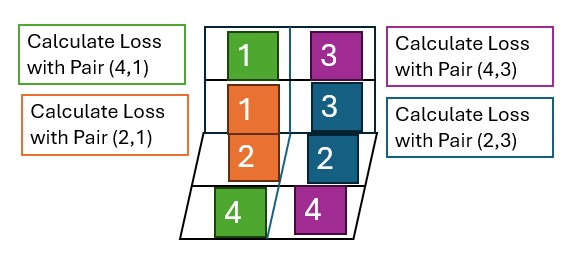

In [14]:
display(Image(filename='Double_grid_explanation.jpg'))

In [12]:
intercept_vals = np.linspace(2.0,6.0, 500)
slope_vals = np.linspace(1.0,5.0, 500)
intercepts, slopes = np.meshgrid(intercept_vals, slope_vals)
T = np.c_[intercepts.ravel(), slopes.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]]) #Training values
yr = 4 * Xr[:, :1] + 3 * Xr[:, 1:] #True y values/labels
J = (1 / len(Xr) * ((T @ Xr.T - yr.T) ** 2).sum(axis=1)).reshape(intercepts.shape)

## Batch Gradient Descent Comparison at Different Learning Rates:

theta =  [[-1754.62741285]
 [-1989.00988106]]


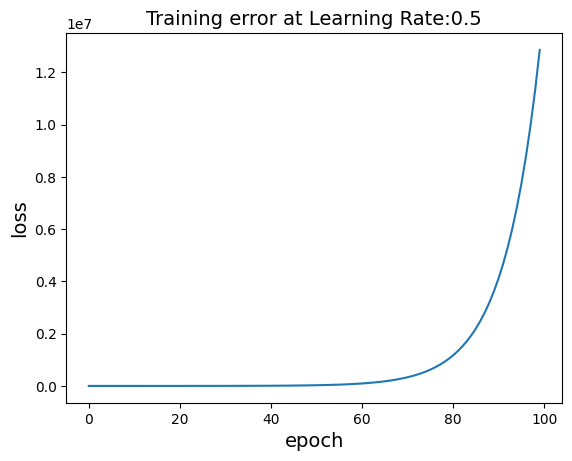

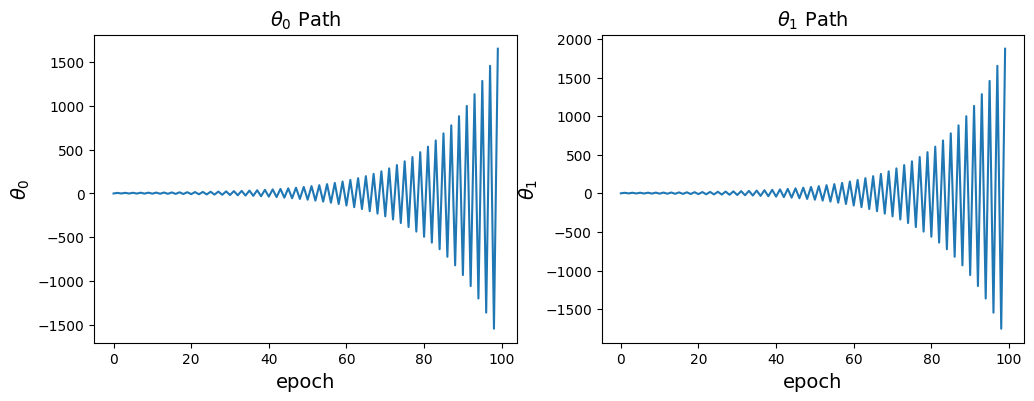

theta =  [[4.07991454]
 [2.90945561]]


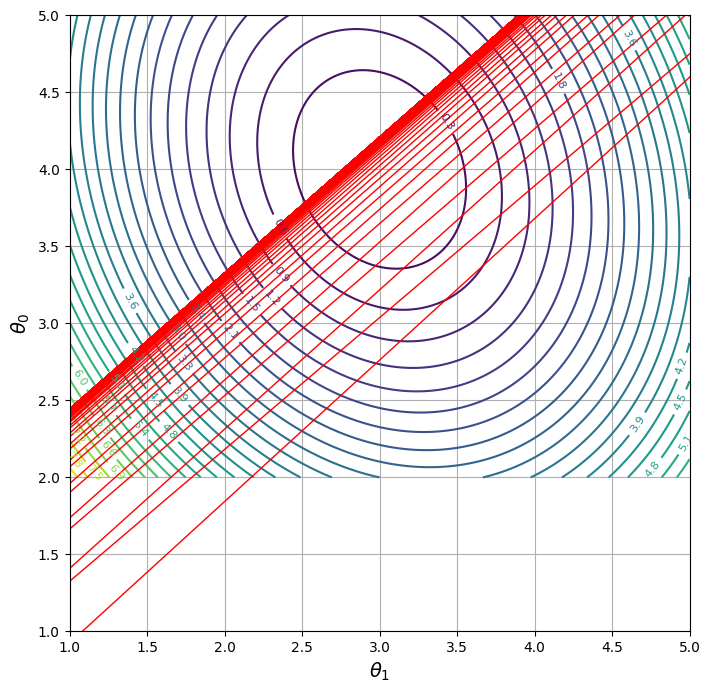

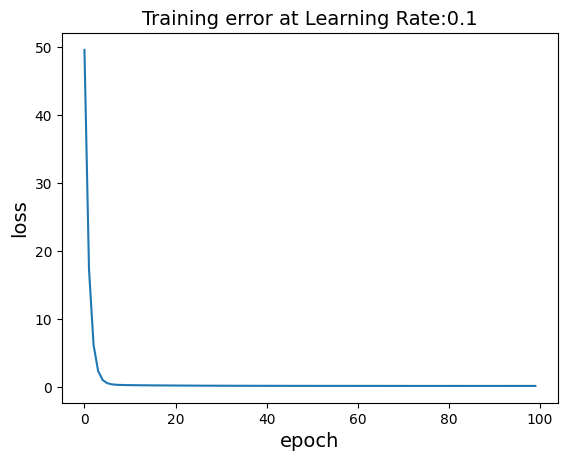

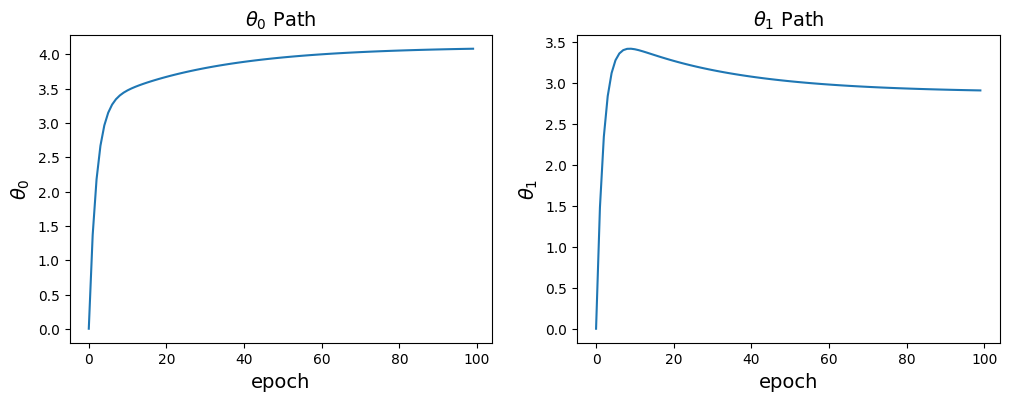

theta =  [[3.43842935]
 [3.37996768]]


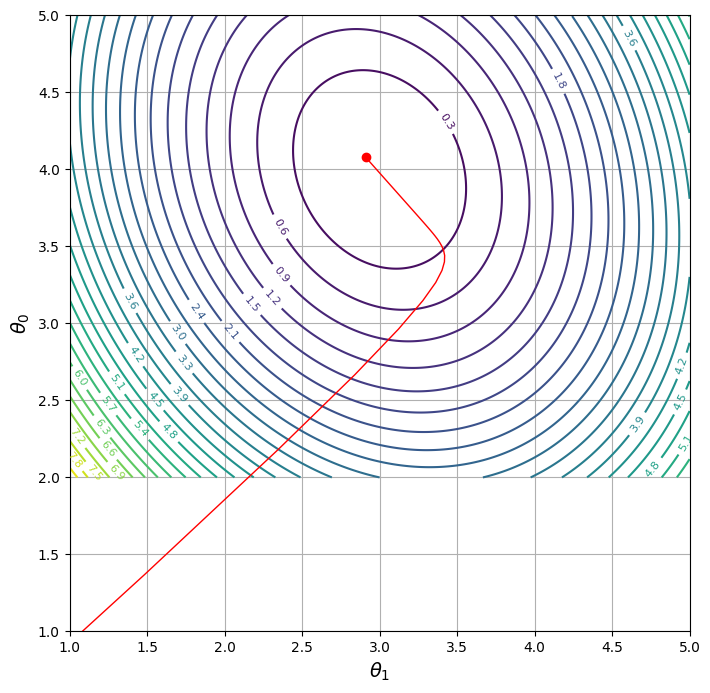

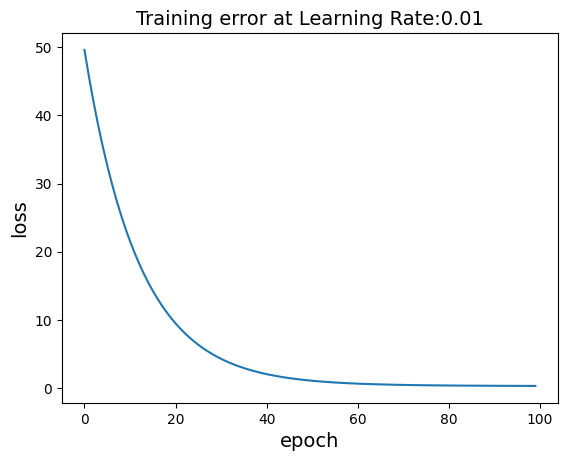

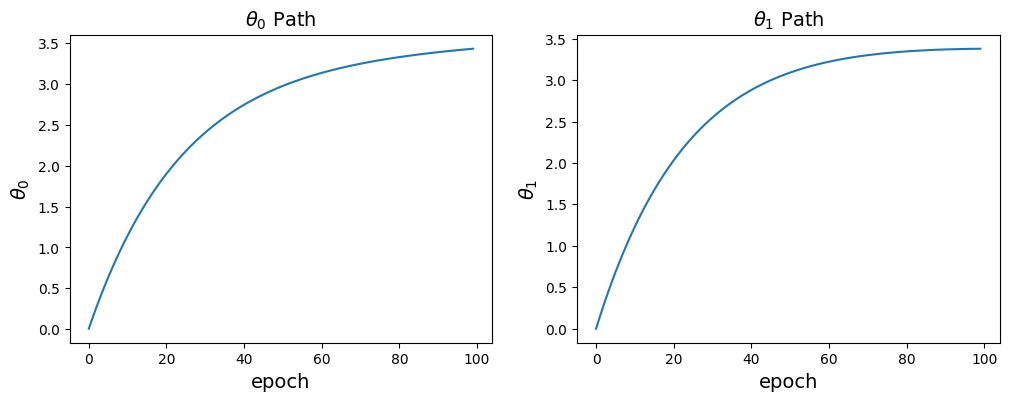

theta =  [[1.12856069]
 [1.21242158]]


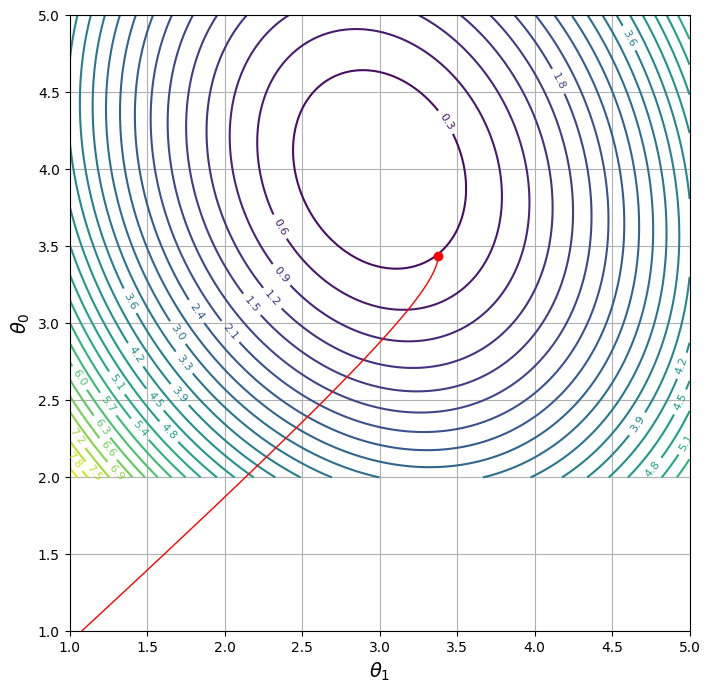

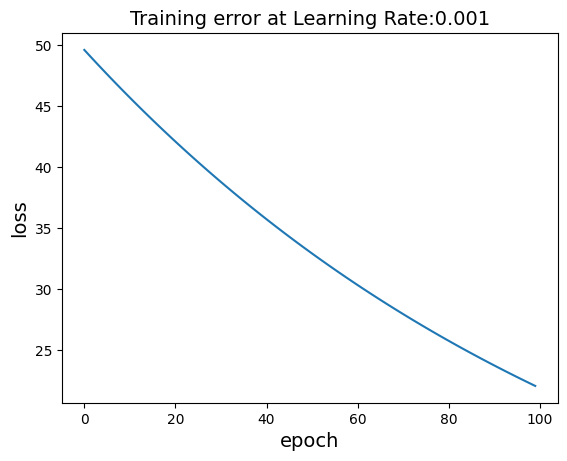

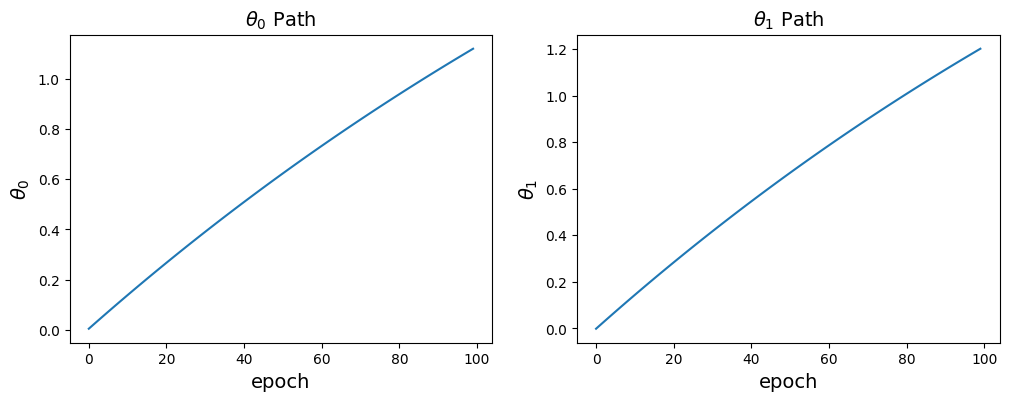

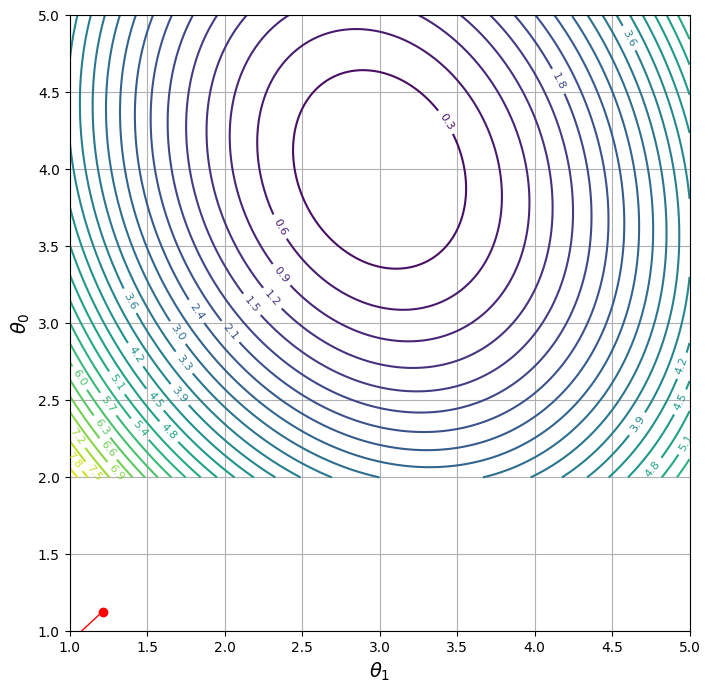

In [13]:
lr_list = [0.5, 0.1, 0.01, 0.001]

for lr in lr_list:
  n_epochs = 100
  m = len(X_b) # number of examples

  #Initilaize thetas randomly
  np.random.seed(42)
  theta = 0.01 * np.random.randn(X_b.shape[1],1)

  #Store losses for plotting
  losses = []
  #list track the evolution of the parameters 𝜃 during training so you can visualize or analyze how gradient descent converges step by step.
  theta_path = [theta]

  for epoch in range(n_epochs): #Iteration that goes through all the data
      loss = 1/m * (X_b @ theta - y).T @ (X_b @ theta - y) #Loss function standard version
      gradient = 2/m * X_b.T @ (X_b @ theta - y) #Derivative of Loss function on theta
      theta = theta - eta * gradient #Theta update

      losses.append(np.squeeze(loss)) # turn them from (m,1) to just m. (m, 1) = (m, d)(d, 1)
      theta_path.append(theta) #Add the updated thetas per each epoch/iteration through all data

  theta_path = np.array(theta_path) #Turn this into an array

  print('theta = ', theta) #Plot the predicted thetas
  #################### Plot The Error / Loss Function ####################################################################
  plt.figure()
  plt.plot(np.arange(n_epochs),losses)
  plt.title(f'Training error at Learning Rate:{eta}')
  plt.ylabel('loss')
  plt.xlabel('epoch');
  #########################################################################################################################

  #################### Plot the Theta changes for each LR####################################################################
  fig, (axs0, axs1) = plt.subplots(1, 2, figsize=(12, 4))
  #Plots for Theta 0
  axs0.plot(np.arange(n_epochs), np.squeeze(theta_path)[:-1, 0])
  axs0.set_title(r'$\theta_0$' + ' Path')
  axs0.set_ylabel(r'$\theta_0$')
  axs0.set_xlabel('epoch')
  #Plots for Theta 1
  axs1.plot(np.arange(n_epochs), np.squeeze(theta_path)[:-1, 1])
  axs1.set_title(r'$\theta_1$' + ' Path')
  axs1.set_ylabel(r'$\theta_1$')
  axs1.set_xlabel('epoch')
  #Show both
  plt.show()
  #########################################################################################################################

  #################### Plot the Gradient Descent ####################################################################
  fig, ax = plt.subplots(figsize=(8,8))
  ax.set_xlim((1,5))
  ax.set_ylim((1,5))
  ax.set_xlabel(r'$\theta_1$')
  ax.set_ylabel(r'$\theta_0$')
  ax.grid(True)

  # Background contour plot
  tt1, tt2 = np.meshgrid(slope_vals, intercept_vals)
  contours = ax.contour(tt1, tt2, J, levels=30, cmap='viridis')
  ax.clabel(contours, inline=True, fontsize=8)

  # create objects (cursor) that will change during animation
  pt, = ax.plot([], [], 'ro') #pt, = defines a changing point thanks to the ",", ro =  red circle marker
  path_line, = ax.plot([], [], 'r-', lw=1) #Similar to the circle we will create a line that moves and writes with linewithd of 1


  # now drawframe with the below helper functions
  def init():
      pt.set_data([], []) #enter data in the moving point 'pt'
      path_line.set_data([], [])
      return [pt, path_line]

  def drawframe(n):
      pt.set_data(theta_path[n,1],theta_path[n,0])
      path_line.set_data(theta_path[:n+1,1],theta_path[:n+1,0])
      return [pt,path_line]


  # blit=True re-draws only the parts that have changed.
  anim = animation.FuncAnimation(fig, drawframe, frames=len(theta_path), init_func = init,
                                interval=50, blit=True,repeat=True)

  anim.save("./gd.mp4", writer='ffmpeg', fps = 30)

  from IPython.display import HTML

  HTML("""
  <video width="480" controls>
    <source src="gd.mp4" type="video/mp4">
    Your browser does not support the video tag.
  </video>
  """)


## Stochastic Gradient Descent Comparison at Different Learning Rates:


> Using a LR schedule with changing starting LR



In [15]:
def choose_t0_t1(lr0, half_life_epochs, m):
  """
  eta(t) = t0 / (t + t1)
  lr0: initial learning rate at step t=0  (lr0 = t0 / t1)
  half_life_epochs: after this many epochs the LR will be ~ eta0 / 2
  m: number of training samples (steps per epoch)

  Returns: (t0, t1)
  """
  if m <= 0 or half_life_epochs <= 0 or lr0 <= 0:
    raise ValueError("eta0, half_life_epochs, and m must be positive.")
  t1 = int(round(half_life_epochs * m))  # steps until LR halves
  t0 = lr0 * t1
  return float(t0), float(t1)


def learning_schedule(t):
  """
  Time-based function to get alpha change smoothly as iterations happen, this is just one of the ways to do so, like:
  step decay: alpha *= drop rate ^ (t/#_epochs_to_drop)
  exponential decay: alpha *= exp(-kt)
  Adaptative methods like ADAM or RMSprop

  Input t = epoch*m + i
    m = number of examples in X
    i = iteration in the data sample of the epoch

  Output = LR or alpha
  """
  return t0 / (t + t1)

Theta using SGD =  [[4.05986339]
 [2.96000945]]


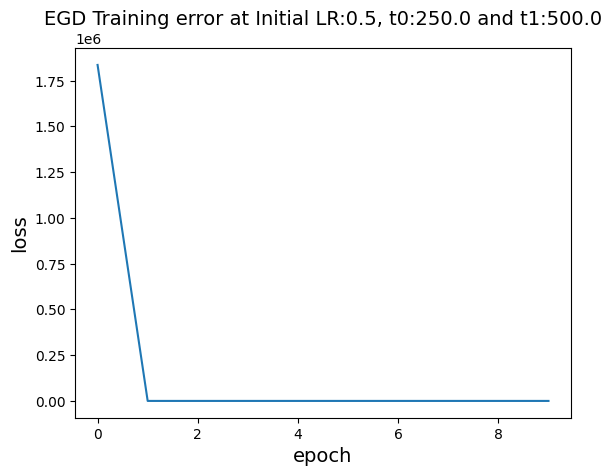

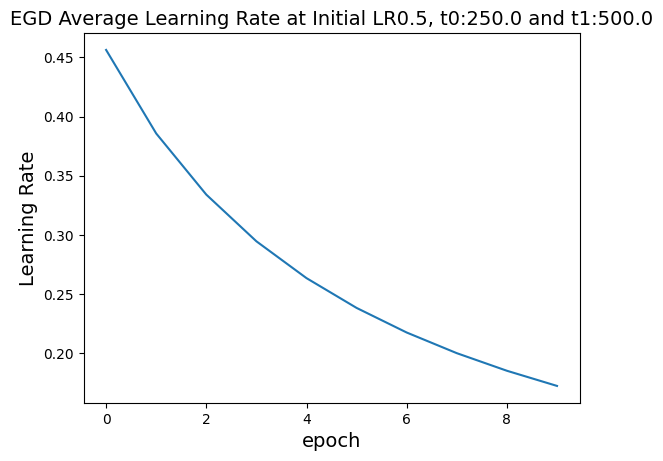

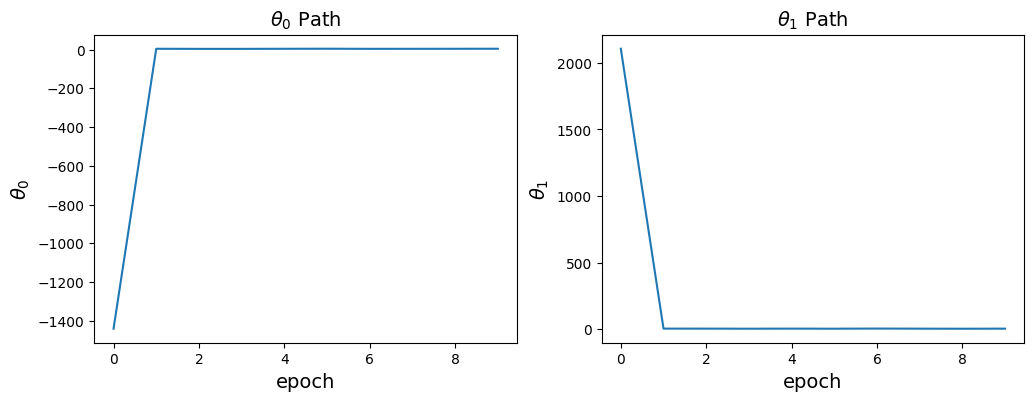

Theta using SGD =  [[4.07176958]
 [2.88510099]]


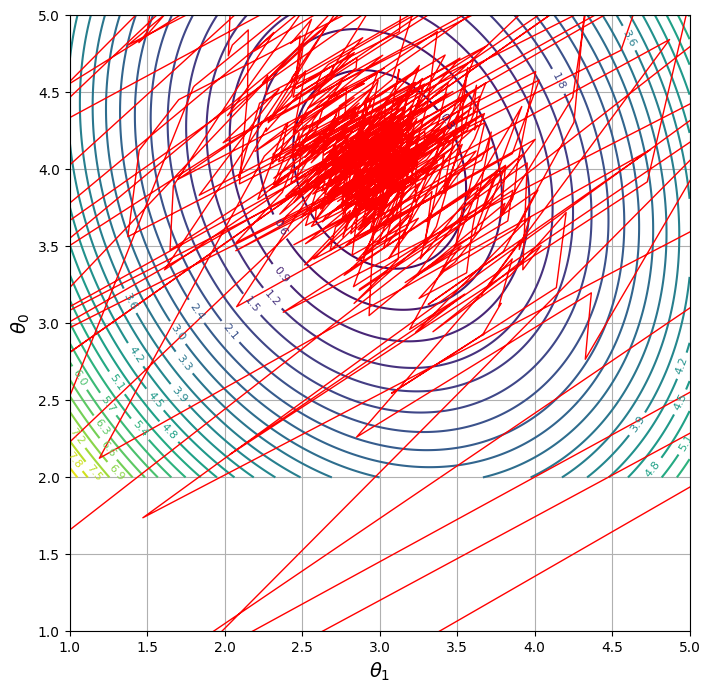

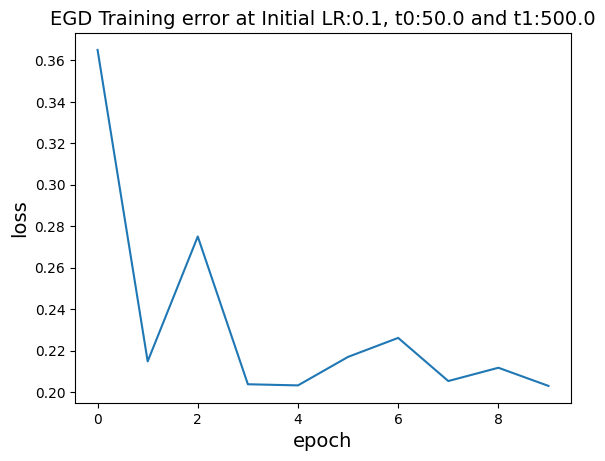

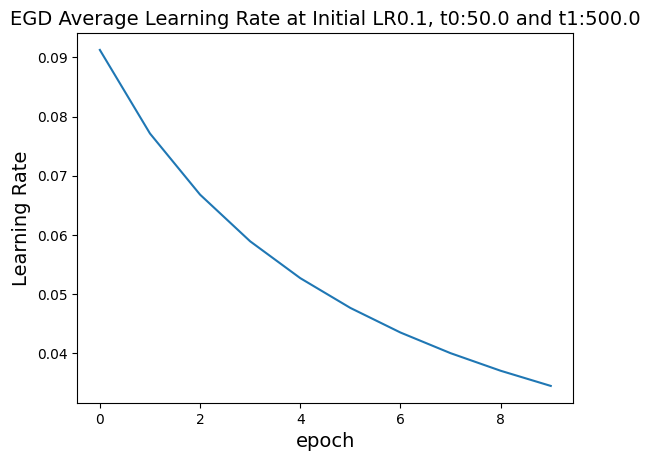

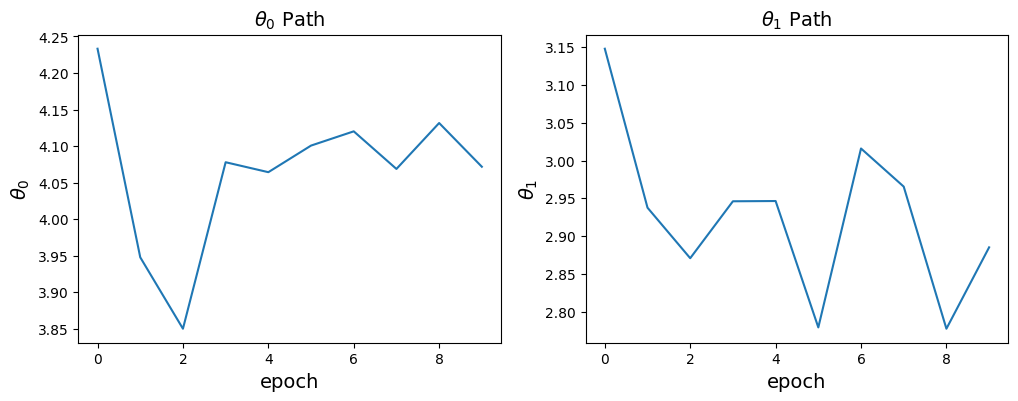

Theta using SGD =  [[3.95772752]
 [3.01925081]]


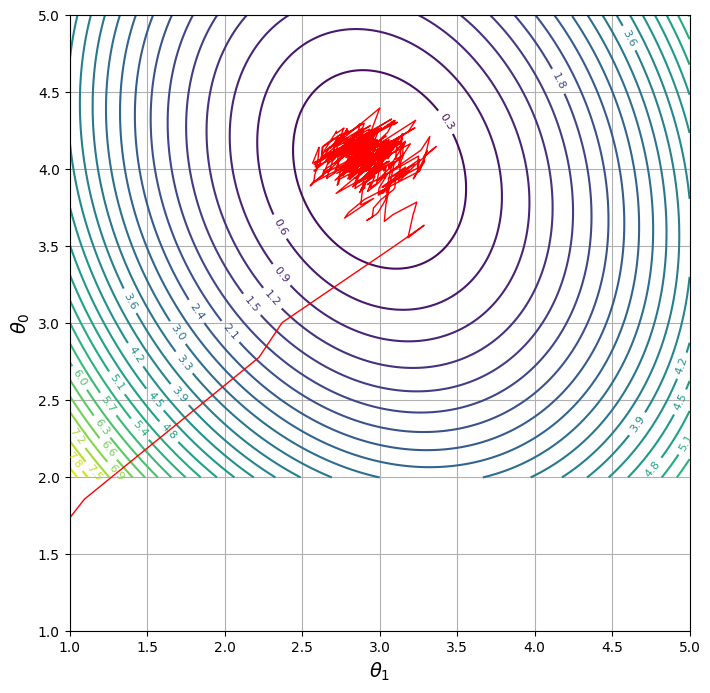

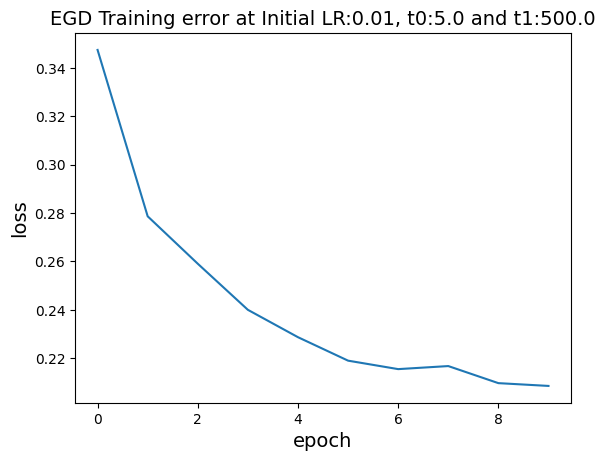

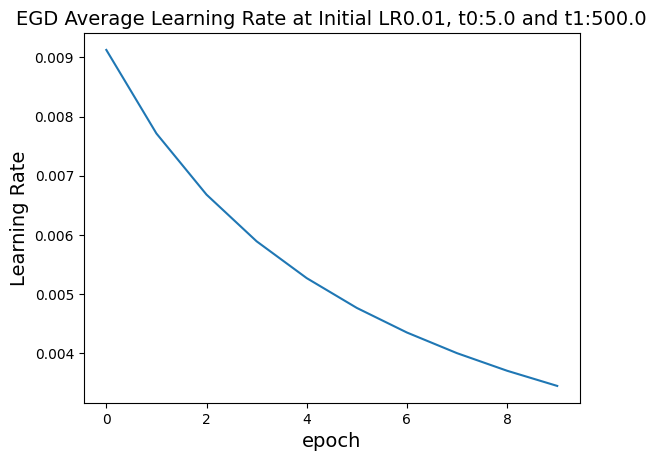

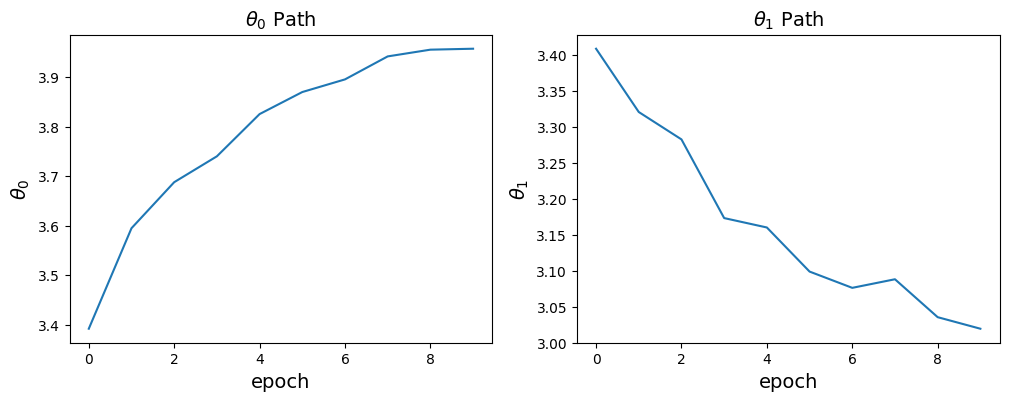

Theta using SGD =  [[3.02776843]
 [3.19378407]]


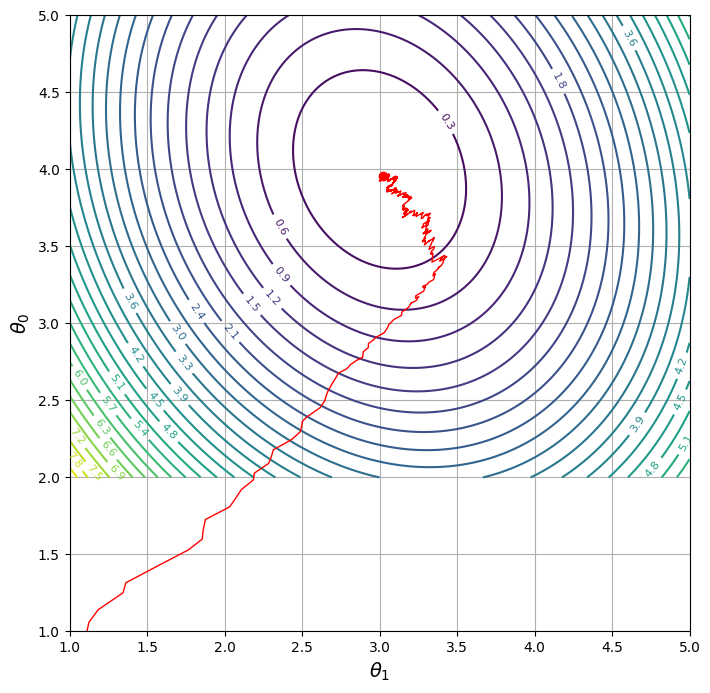

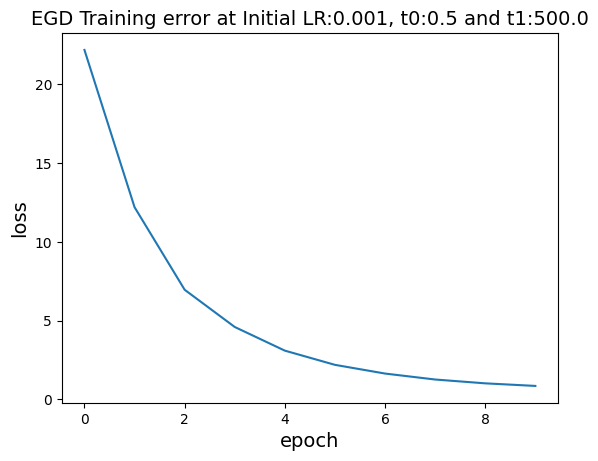

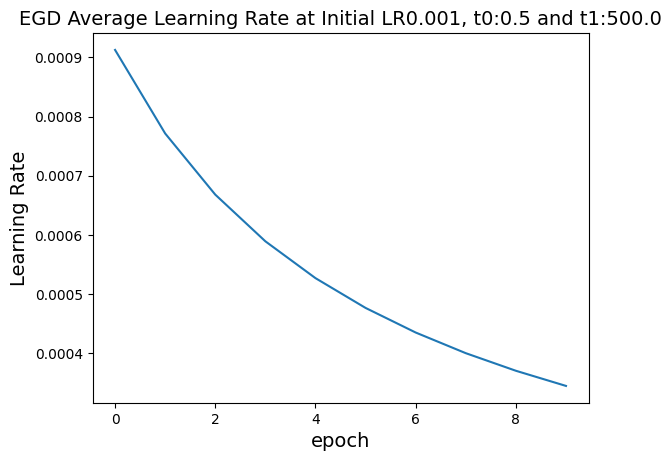

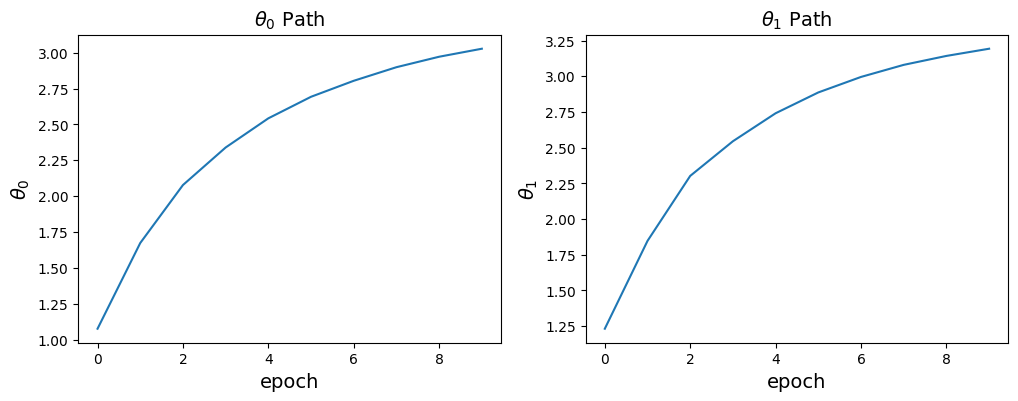

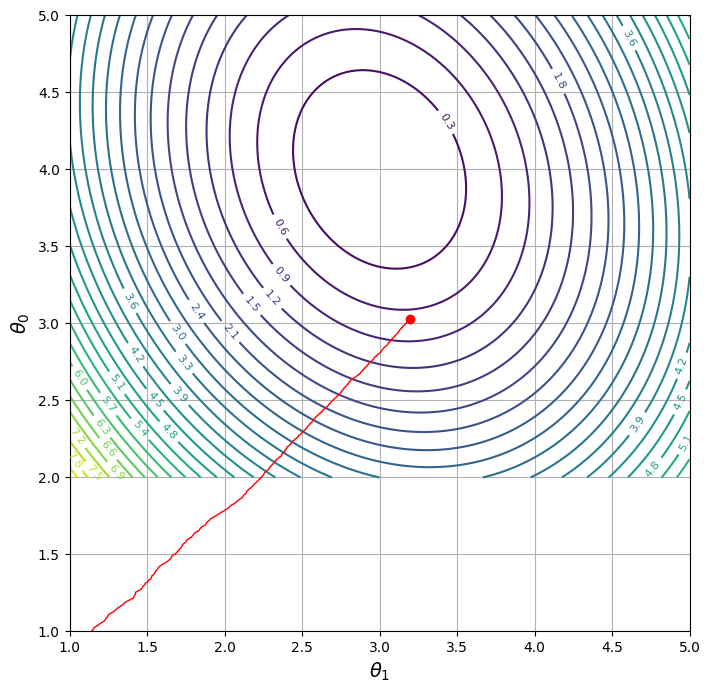

In [19]:
lr_list = [0.5, 0.1, 0.01, 0.001]
list_parameter = []

for lr in lr_list:
  t0, t1 = choose_t0_t1(lr0=lr, half_life_epochs=5, m=len(X_b))
  list_parameter.append((t0, t1, lr))

for t0, t1, lr0 in list_parameter:
  n_epochs = 10

  X_b = add_dummy_feature(X)  # add x0 = 1 to each instance
  np.random.seed(42)
  theta = 0.01 * np.random.randn(X_b.shape[1], 1)  # random initialization
  theta_path_sgd = [theta] #To keep track of thetas as they change

  #Store losses for plotting
  losses = []
  thetas_per_epoch = []
  lrs = []

  #Start Training
  for epoch in range(n_epochs): #for each full data check / AKA epoch
      alphas = []
      for iter in range(X_b.shape[0]):  #For each training sample in the epoch (this case all of them)
          ridx = np.random.randint(X_b.shape[0]) #randomly choose a training sample with replacement (unbiased but noisy)
          xi = X_b[ridx : ridx + 1,:]
          yi = y[ridx : ridx + 1]
          gradients = 2 * xi.T @ (xi @ theta - yi)  # for SGD, do not divide by m since we are not considering all samples, just the ith sample
          alpha = learning_schedule(epoch * m + iter) #calculate learning rates
          alphas.append(alpha)
          theta = theta - alpha * gradients #update thetas
          theta_path_sgd.append(theta)  #append theta history into the record list

      lrs.append(np.mean(alphas))
      thetas_per_epoch.append(theta) #append theta history into the record list
      loss = ((X_b @ theta - y) ** 2).mean() #Loss function standard version
      losses.append(float(loss)) #append loss history into the record list

  theta_path_sgd = np.array(theta_path_sgd) #turn into np arraay

  print("Theta using SGD = ", theta)

  #################### Plot The Error / Loss Function ####################################################################
  plt.figure()
  plt.plot(np.arange(n_epochs), losses)
  plt.title(f'EGD Training error at Initial LR:{lr0}, t0:{t0} and t1:{t1}')
  plt.ylabel('loss')
  plt.xlabel('epoch');
  #########################################################################################################################

   #################### Plot Average LR/alpha (each sample has its own LR) ####################################################################
  plt.figure()
  plt.plot(np.arange(n_epochs), lrs)
  plt.title(f'EGD Average Learning Rate at Initial LR{lr0}, t0:{t0} and t1:{t1}')
  plt.ylabel('Learning Rate')
  plt.xlabel('epoch');
  #########################################################################################################################

  #################### Plot the Theta changes for each LR####################################################################
  fig, (axs0, axs1) = plt.subplots(1, 2, figsize=(12, 4))
  #Plots for Theta 0
  axs0.plot(np.arange(n_epochs), np.squeeze(thetas_per_epoch)[:, 0])
  axs0.set_title(r'$\theta_0$' + ' Path')
  axs0.set_ylabel(r'$\theta_0$')
  axs0.set_xlabel('epoch')
  #Plots for Theta 1
  axs1.plot(np.arange(n_epochs), np.squeeze(thetas_per_epoch)[:, 1])
  axs1.set_title(r'$\theta_1$' + ' Path')
  axs1.set_ylabel(r'$\theta_1$')
  axs1.set_xlabel('epoch')
  #Show both
  plt.show()
  #########################################################################################################################

  #################### Plot the Gradient Descent ####################################################################
  fig, ax = plt.subplots(figsize=(8,8))
  ax.set_xlim((1,5))
  ax.set_ylim((1,5))
  ax.set_xlabel(r'$\theta_1$')
  ax.set_ylabel(r'$\theta_0$')
  ax.grid(True)

  # Background contour plot
  tt1,tt2 = np.meshgrid(slope_vals,intercept_vals)
  contours = ax.contour(tt1, tt2, J, levels=30, cmap='viridis')

  ax.clabel(contours, inline=True, fontsize=8)

  # create objects that will change during animation
  pt, = ax.plot([],[],'ro')
  path_line, = ax.plot([],[],'r-',lw=1)

  # now drawframe

  def init():
      pt.set_data([],[])
      path_line.set_data([],[])
      return [pt,path_line]

  def drawframe(n):
      pt.set_data(theta_path_sgd[n,1],theta_path_sgd[n,0])
      path_line.set_data(theta_path_sgd[:n+1,1],theta_path_sgd[:n+1,0])

      return [pt,path_line]

  # blit=True re-draws only the parts that have changed.
  anim = animation.FuncAnimation(fig, drawframe, frames=len(theta_path_sgd), init_func = init,
                                interval=50, blit=True,repeat=True)

  #plt.show()

  anim.save("./sgd.mp4", writer='ffmpeg', fps = 30)

  from IPython.display import HTML

  HTML("""
  <video width="480" controls>
    <source src="sgd.mp4" type="video/mp4">
    Your browser does not support the video tag.
  </video>
  """)





## Mini-Batch Stochastic Gradient Descent Comparison at Different Learning Rates:


> Using a LR schedule with changing starting LR



In [20]:
def choose_t0_t1(lr0, half_life_epochs, m):
  """
  eta(t) = t0 / (t + t1)
  lr0: initial learning rate at step t=0  (lr0 = t0 / t1)
  half_life_epochs: after this many epochs the LR will be ~ eta0 / 2
  m: number of training samples (steps per epoch)

  Returns: (t0, t1)
  """
  if m <= 0 or half_life_epochs <= 0 or lr0 <= 0:
    raise ValueError("eta0, half_life_epochs, and m must be positive.")
  t1 = int(round(half_life_epochs * m))  # steps until LR halves
  t0 = lr0 * t1
  return float(t0), float(t1)


def learning_schedule(t):
  """
  Time-based function to get alpha change smoothly as iterations happen, this is just one of the ways to do so, like:
  step decay: alpha *= drop rate ^ (t/#_epochs_to_drop)
  exponential decay: alpha *= exp(-kt)
  Adaptative methods like ADAM or RMSprop

  Input t = epoch*m + i
    m = number of examples in X
    i = iteration in the data sample of the epoch

  Output = LR or alpha
  """
  return t0 / (t + t1)

Theta using SGD =  [[4.18966869]
 [2.97037117]]


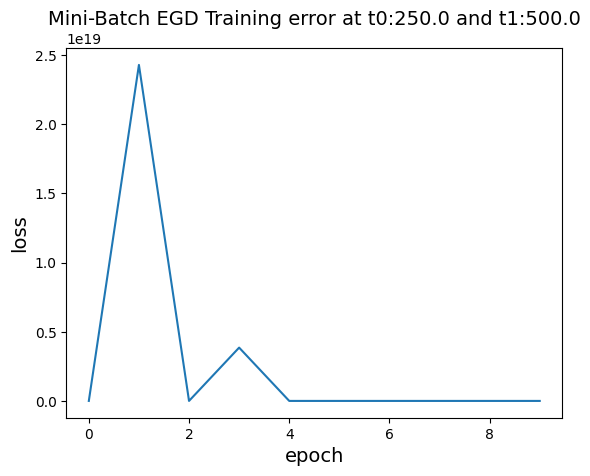

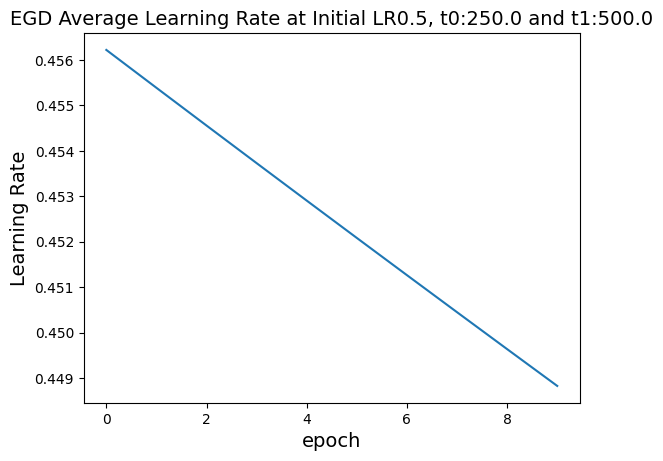

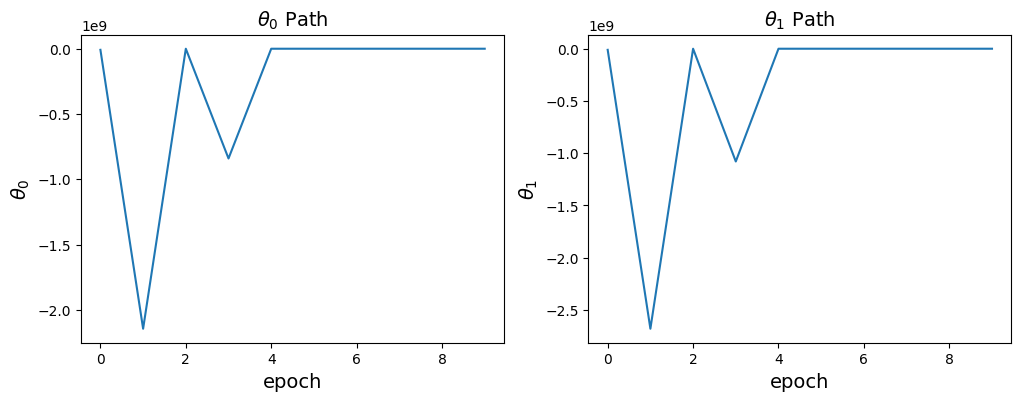

Theta using SGD =  [[4.17970556]
 [2.97952897]]


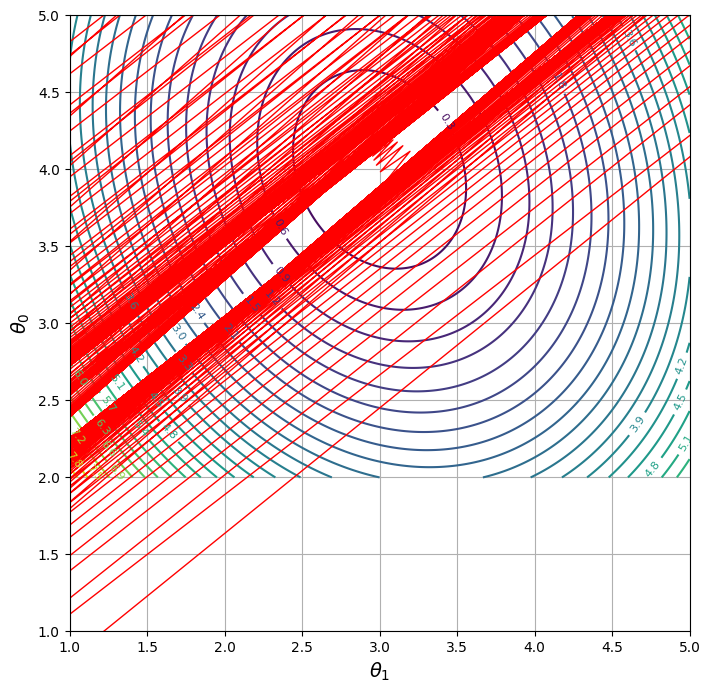

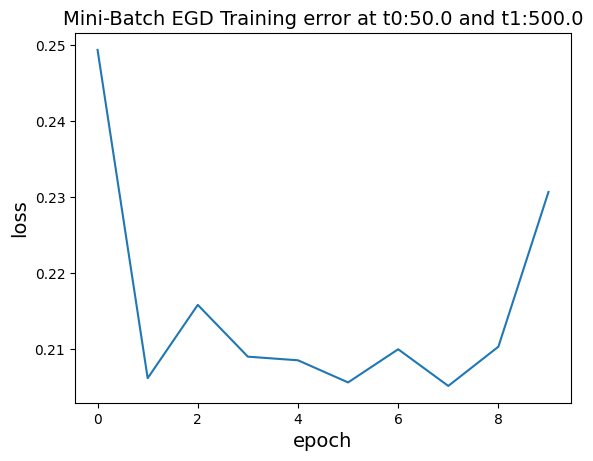

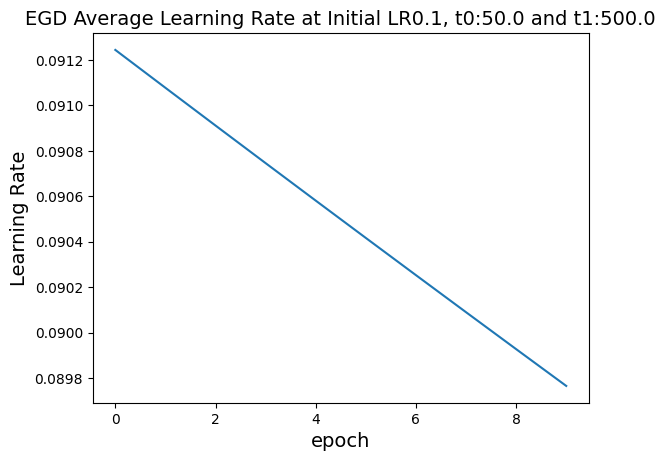

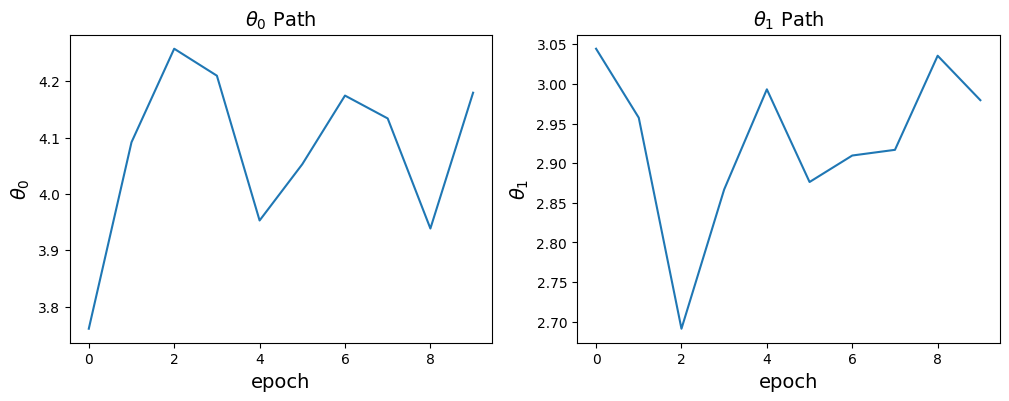

Theta using SGD =  [[4.09744172]
 [3.05095893]]


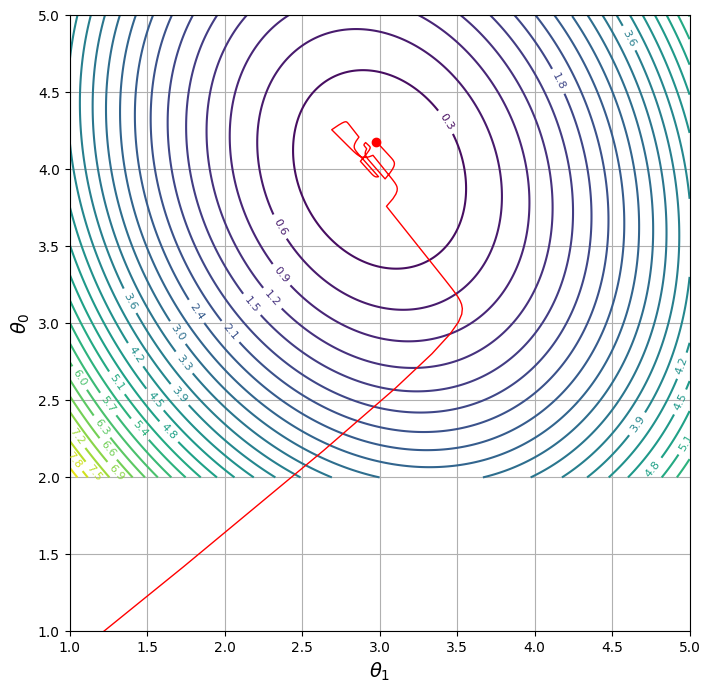

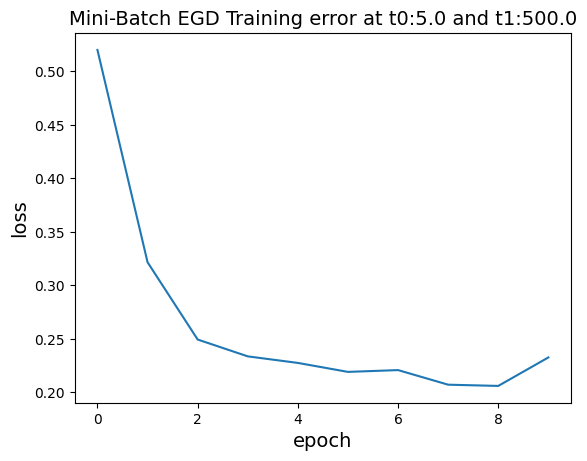

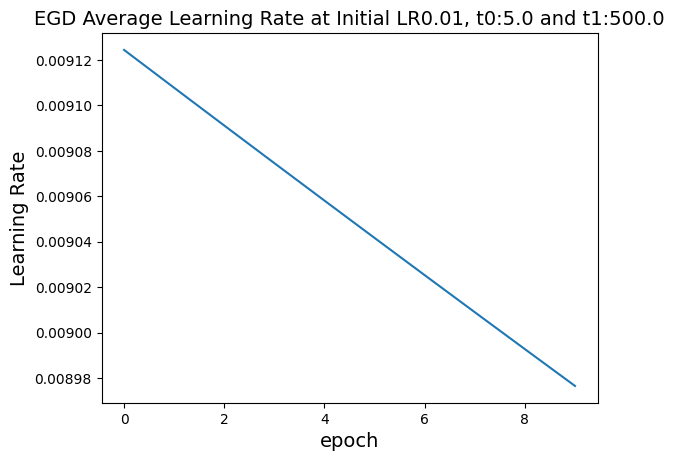

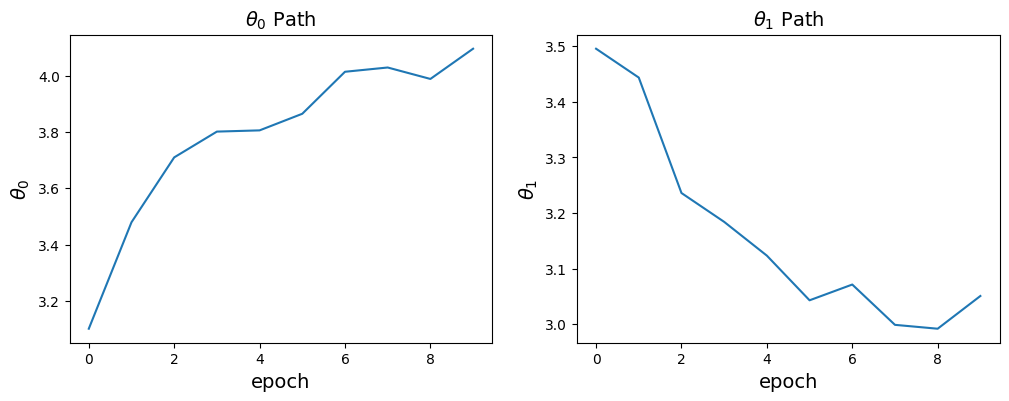

Theta using SGD =  [[3.34007831]
 [3.48383132]]


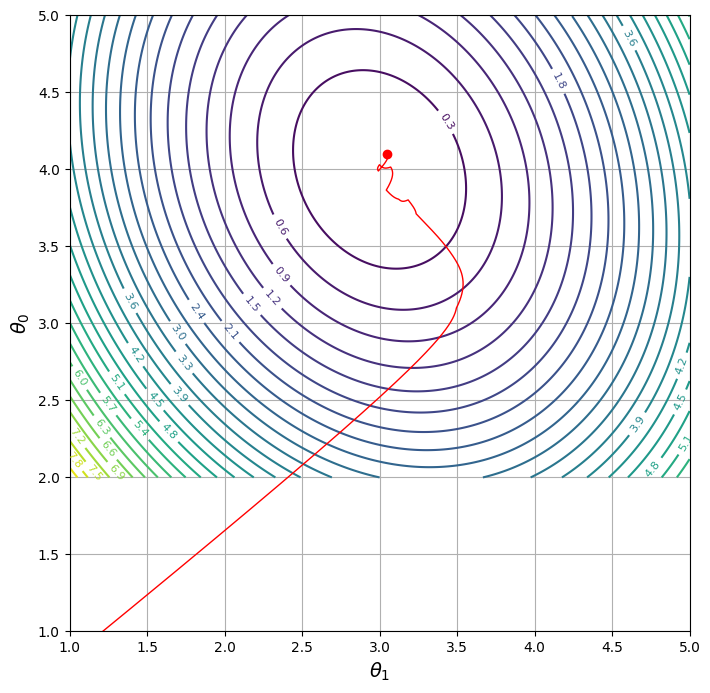

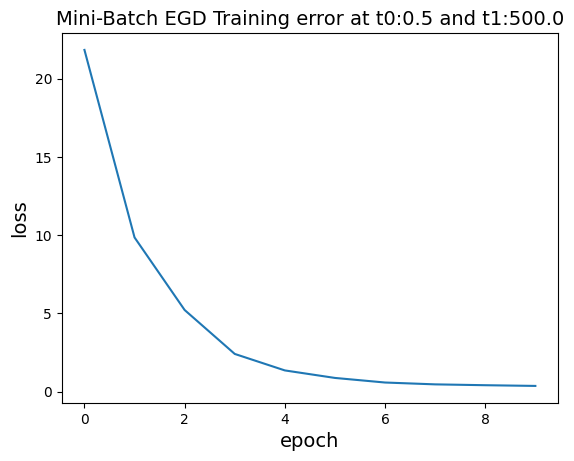

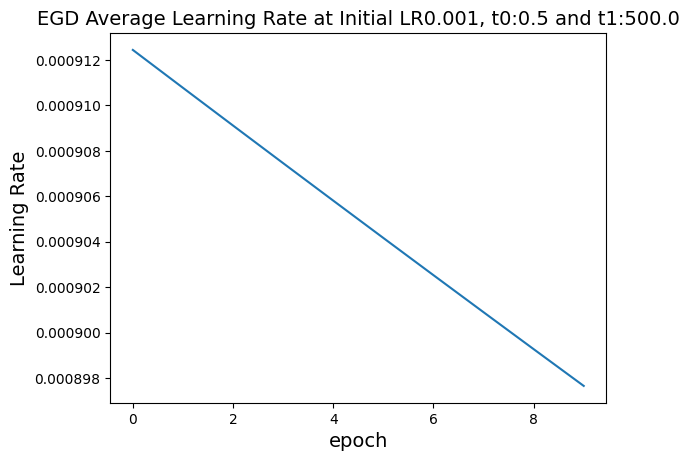

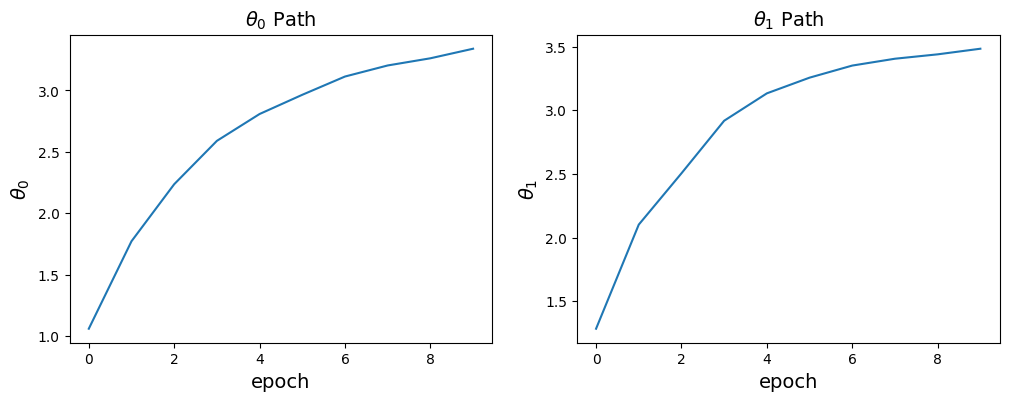

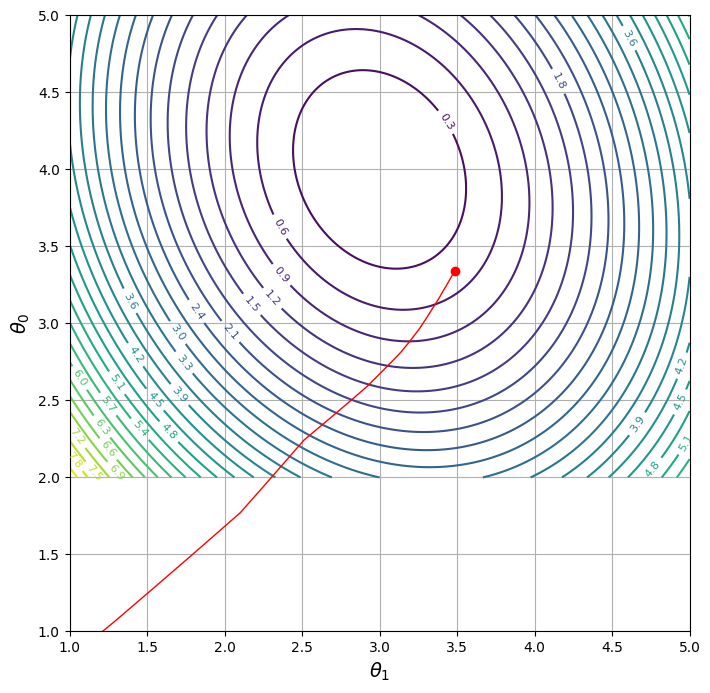

In [22]:
lr_list = [0.5, 0.1, 0.01, 0.001]
list_parameter = []

for lr in lr_list:
  t0, t1 = choose_t0_t1(lr0=lr, half_life_epochs=5, m=len(X_b))
  list_parameter.append((t0, t1, lr))

for t0, t1, lr0 in list_parameter:
  n_epochs = 10
  minibatch_size = 20
  num_batches_per_epoch = np.ceil(m/X_b.shape[0]) #new m value

  X_b = add_dummy_feature(X)  # add x0 = 1 to each instance

  np.random.seed(42)
  theta = 0.01 * np.random.randn(X_b.shape[1], 1)  # random initialization

  theta_path_mgd = [theta] #To keep track of thetas as they change

  epoch_losses = []
  thetas_per_epoch = []
  lrs = []

  for epoch in range(n_epochs): #For each iteration on all batches
      shuffle_idx = np.random.permutation(X_b.shape[0]) #Get random indexes for creating the batches
      X_b_shuffled = X_b[shuffle_idx] #shuffle x data samplesbased on shuffled indexes
      y_shuffled = y[shuffle_idx] #shuffle y labels based on shuffled indexes
      alphas = []
      for i in range(X_b.shape[0]): #For each training sample on all data
          idx = i * minibatch_size # get the index for the batch size to split data in mini batches
          xi = X_b_shuffled[ridx : ridx + minibatch_size] #extract a mini batch of the suffled data
          yi = y_shuffled[ridx : ridx + minibatch_size] #extract a mini batch of the suffled labels
          gradients = 2/minibatch_size  * xi.T @ (xi @ theta - yi)  # for SGD, do not divide by m
          alpha = learning_schedule(epoch * num_batches_per_epoch + i) #Calculate learning rate
          theta = theta - alpha * gradients #Update theta using the same formula as stochastic gradent descent
          alphas.append(alpha)
          theta_path_mgd.append(theta)

      lrs.append(np.mean(alphas))
      thetas_per_epoch.append(theta) #append theta history into the record list
      epoch_loss = ((X_b @ theta - y) ** 2).mean() #Loss function standard version
      epoch_losses.append(float(epoch_loss)) #append loss history into the record list

  theta_path_mgd = np.array(theta_path_mgd)

  print("Theta using Mini-Batch E GD = ", theta)

  #################### Plot Loss/Cost Function ####################################################################
  plt.figure()
  plt.plot(np.arange(n_epochs), epoch_losses)
  plt.title(f'Mini-Batch EGD Training error at t0:{t0} and t1:{t1}')
  plt.ylabel('loss')
  plt.xlabel('epoch');
  #########################################################################################################################

  #################### Plot Average LR/alpha (each sample has its own LR) ####################################################################
  plt.figure()
  plt.plot(np.arange(n_epochs), lrs)
  plt.title(f'Mini-Batch EGD Average Learning Rate at Initial LR{lr0}, t0:{t0} and t1:{t1}')
  plt.ylabel('Learning Rate')
  plt.xlabel('epoch');
  #########################################################################################################################

  #################### Plot the Theta changes for each LR####################################################################
    #Plot the Theta changes for each LR
  fig, (axs0, axs1) = plt.subplots(1, 2, figsize=(12, 4))
  #Plots for Theta 0
  axs0.plot(np.arange(n_epochs), np.squeeze(thetas_per_epoch)[:, 0])
  axs0.set_title(r'$\theta_0$' + ' Path')
  axs0.set_ylabel(r'$\theta_0$')
  axs0.set_xlabel('epoch')
  #Plots for Theta 1
  axs1.plot(np.arange(n_epochs), np.squeeze(thetas_per_epoch)[:, 1])
  axs1.set_title(r'$\theta_1$' + ' Path')
  axs1.set_ylabel(r'$\theta_1$')
  axs1.set_xlabel('epoch')
  #Show both
  plt.show()
  #########################################################################################################################

  #################### Plot the Gradient Descent ####################################################################
  fig, ax = plt.subplots(figsize=(8,8))
  ax.set_xlim((1,5))
  ax.set_ylim((1,5))
  ax.set_xlabel(r'$\theta_1$')
  ax.set_ylabel(r'$\theta_0$')
  ax.grid(True)

  # Background contour plot
  tt1,tt2 = np.meshgrid(slope_vals,intercept_vals)
  contours = ax.contour(tt1, tt2, J, levels=30, cmap='viridis')

  ax.clabel(contours, inline=True, fontsize=8)

  # create objects that will change during animation
  pt, = ax.plot([],[],'ro')
  path_line, = ax.plot([],[],'r-',lw=1)

  # now drawframe

  def init():
      pt.set_data([],[])
      path_line.set_data([],[])
      return [pt,path_line]

  def drawframe(n):
      pt.set_data(theta_path_mgd[n,1],theta_path_mgd[n,0])
      path_line.set_data(theta_path_mgd[:n+1,1],theta_path_mgd[:n+1,0])

      return [pt,path_line]

  # blit=True re-draws only the parts that have changed.
  anim = animation.FuncAnimation(fig, drawframe, frames=len(theta_path_mgd), init_func = init,
                                interval=50, blit=True,repeat=True)



  anim.save("./minibatch_gd.mp4", writer='ffmpeg', fps = 30)

  from IPython.display import HTML

  HTML("""
  <video width="480" controls>
    <source src="minibatch_gd.mp4" type="video/mp4">
    Your browser does not support the video tag.
  </video>
  """)